📊 Analyzing LeetCode profile for: _akanksharoy



,Metric,Value
0,Total Solved,541.0
1,Total Questions,3617.0
2,Easy Solved,261.0
3,Medium Solved,247.0
4,Hard Solved,33.0
5,Acceptance Rate (%),77.4
6,Ranking,127190.0
7,Contribution Points,2507.0
8,Reputation,3.0


/tmp/ipython-input-12-4147099428.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=levels, y=values, palette="viridis")


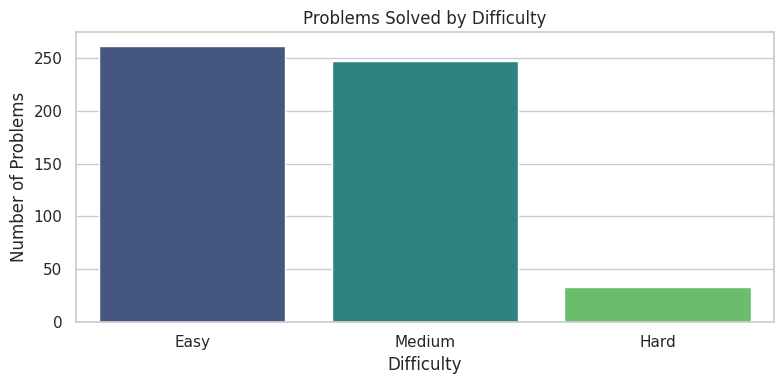

/tmp/ipython-input-12-4147099428.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=levels, y=rates, palette="rocket")


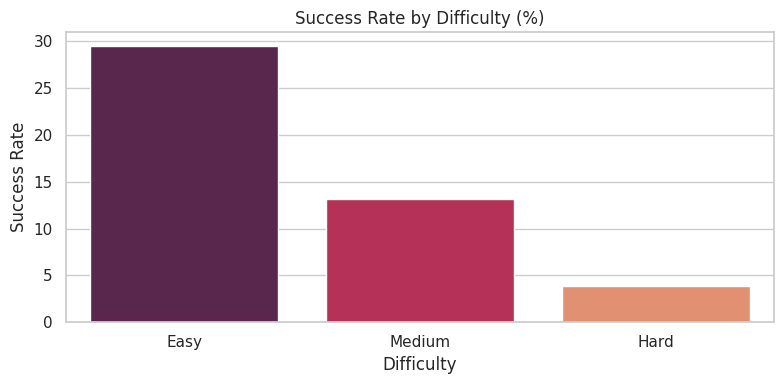


🔍 Insights:
- Overall Acceptance Rate: 77.4%
- Most solved difficulty: Easy
- Hardest segment (lowest success rate): Hard
- Global Ranking: 127190
- Contribution Points: 2507


In [12]:

# ✅ Install required packages
!pip install requests matplotlib seaborn

# ✅ Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ✅ Fetch LeetCode data using unofficial API
def fetch_leetcode_data(username):
    url = f"https://leetcode-stats-api.herokuapp.com/{username}"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to fetch data")

# ✅ Analyze user data
def analyze_user(username):
    data = fetch_leetcode_data(username)
    print(f"📊 Analyzing LeetCode profile for: {username}\n")

    # Basic stats
    stats = {
        "Total Solved": data["totalSolved"],
        "Total Questions": data["totalQuestions"],
        "Easy Solved": data["easySolved"],
        "Medium Solved": data["mediumSolved"],
        "Hard Solved": data["hardSolved"],
        "Acceptance Rate (%)": data["acceptanceRate"],
        "Ranking": data["ranking"],
        "Contribution Points": data["contributionPoints"],
        "Reputation": data["reputation"]
    }

    df_stats = pd.DataFrame(stats.items(), columns=["Metric", "Value"])
    display(df_stats)

    # ✅ Bar plot for problem difficulty
    plt.figure(figsize=(8, 4))
    levels = ["Easy", "Medium", "Hard"]
    values = [data["easySolved"], data["mediumSolved"], data["hardSolved"]]
    sns.barplot(x=levels, y=values, palette="viridis")
    plt.title("Problems Solved by Difficulty")
    plt.ylabel("Number of Problems")
    plt.xlabel("Difficulty")
    plt.tight_layout()
    plt.show()

    # ✅ Acceptance rate over difficulty
    plt.figure(figsize=(8, 4))
    rates = [
        data["easySolved"] / data["totalEasy"] * 100,
        data["mediumSolved"] / data["totalMedium"] * 100,
        data["hardSolved"] / data["totalHard"] * 100,
    ]
    sns.barplot(x=levels, y=rates, palette="rocket")
    plt.title("Success Rate by Difficulty (%)")
    plt.ylabel("Success Rate")
    plt.xlabel("Difficulty")
    plt.tight_layout()
    plt.show()

    # ✅ Print insights
    print("\n🔍 Insights:")
    print(f"- Overall Acceptance Rate: {round(data['acceptanceRate'], 2)}%")
    print(f"- Most solved difficulty: {levels[values.index(max(values))]}")
    print(f"- Hardest segment (lowest success rate): {levels[rates.index(min(rates))]}")
    print(f"- Global Ranking: {data['ranking']}")
    print(f"- Contribution Points: {data['contributionPoints']}")

# ✅ Run the analyzer
username = "_akanksharoy"
analyze_user(username)
